<a href="https://colab.research.google.com/github/C3578/Recognition_arabic_numerals/blob/master/net_recognition_arabic_numerals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
print(os.getcwd())

/content


In [ ]:
data_root = '...'
print(os.listdir(data_root))

['arab_10.png', 'arab_16.png', 'arab_14.png', 'arab_18.png', 'arab_12.png', 'train', 'arab_11.png', 'val_3', 'train_3', 'mnist_net', 'mnist_net.pth', 'mnist_net_2.pth']


In [ ]:
import shutil 
from tqdm import tqdm

train_dir = 'train_3'
val_dir = 'val_3'

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

for dir_name in [train_dir, val_dir]:
    for class_name in class_names:
        os.makedirs(os.path.join(data_root + dir_name, class_name), exist_ok=True)

for class_name in class_names:
    source_dir = os.path.join(data_root + 'train', class_name)
    for i, file_name in enumerate(tqdm(os.listdir(source_dir))):
        if i % 6 != 0:
            dest_dir = os.path.join(data_root, train_dir, class_name) 
        else:
            dest_dir = os.path.join(data_root, val_dir, class_name)
        shutil.copy(os.path.join(source_dir, file_name), os.path.join(dest_dir, file_name))

100%|██████████| 6/6 [00:00<00:00, 102.16it/s]


In [ ]:
train_dir = data_root + 'train_3'
val_dir = data_root + 'val_3'


In [ ]:
import torch
import numpy as np
import torchvision
import matplotlib.pyplot as plt
import time
import copy

from torchvision import transforms, models
train_transforms = transforms.Compose([
    #transforms.RandomRotation((-15, 15), expand=True, center=(112, 112)),
    transforms.RandomAffine((-5, +5), shear=(-5, + 5), fillcolor=(255, 255, 255)),
    torchvision.transforms.Grayscale(num_output_channels=1),
    #transforms.RandomAffine((-5, +5)),
    #transforms.RandomAffine((-5, +5), scale=(0.7, 0.7), shear=(-10, + 10), resample=False, fillcolor=0),
    transforms.ColorJitter(0.2, 0.2, 0.2, 0.2),
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.reshape([28 * 28])),
    #transforms.Lambda(lambda x: x.reshape([28, 28])),
    #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    #transforms.RandomRotation((-15, 15), expand=True, center=(112, 112)),
    #transforms.RandomAffine((-10, +10), scale=(0.7, 0.7), shear=(-10, + 10), resample=False, fillcolor=0),
    transforms.RandomAffine((-5, +5), shear=(-5, + 5), fillcolor=(255, 255, 255)),
    torchvision.transforms.Grayscale(num_output_channels=1),
    transforms.ColorJitter(0.2, 0.2, 0.2, 0.2),
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.reshape([28 * 28])),
    #transforms.Lambda(lambda x: x.reshape([28, 28])),
    #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset = torchvision.datasets.ImageFolder(train_dir, train_transforms)
val_dataset = torchvision.datasets.ImageFolder(val_dir, val_transforms)


batch_size = 50
train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, num_workers=batch_size)
val_dataloader = torch.utils.data.DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, num_workers=batch_size)

In [ ]:
len(train_dataloader), len(train_dataset)

(1, 50)

torch.Size([784])
<class 'torch.Tensor'>


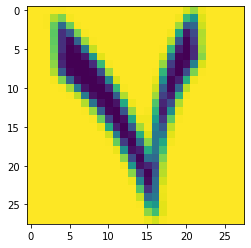

torch.Size([784])
<class 'torch.Tensor'>


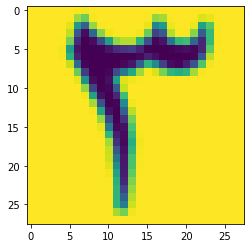

torch.Size([784])
<class 'torch.Tensor'>


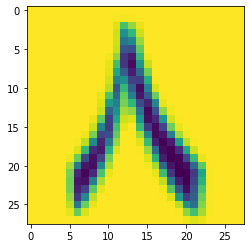

torch.Size([784])
<class 'torch.Tensor'>


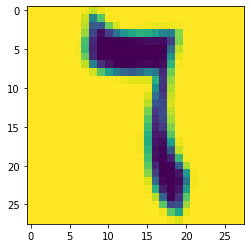

torch.Size([784])
<class 'torch.Tensor'>


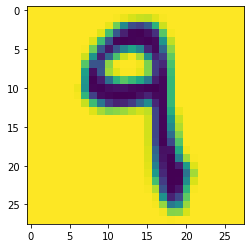

torch.Size([784])
<class 'torch.Tensor'>


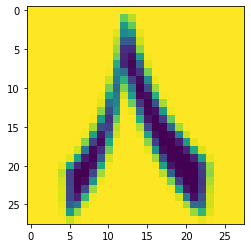

torch.Size([784])
<class 'torch.Tensor'>


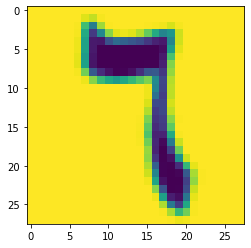

torch.Size([784])
<class 'torch.Tensor'>


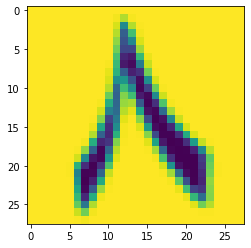

torch.Size([784])
<class 'torch.Tensor'>


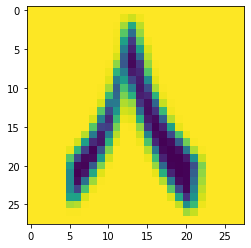

torch.Size([784])
<class 'torch.Tensor'>


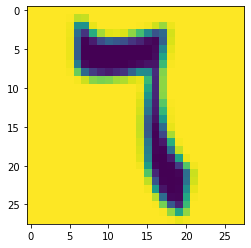

torch.Size([784])
<class 'torch.Tensor'>


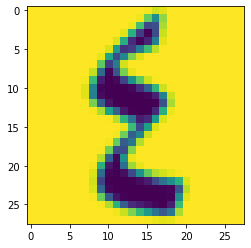

torch.Size([784])
<class 'torch.Tensor'>


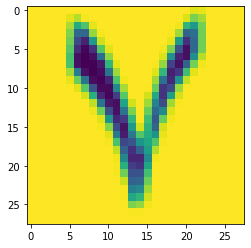

torch.Size([784])
<class 'torch.Tensor'>


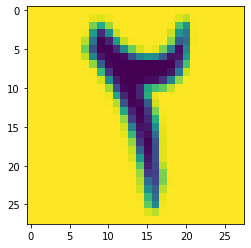

torch.Size([784])
<class 'torch.Tensor'>


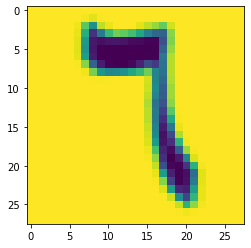

torch.Size([784])
<class 'torch.Tensor'>


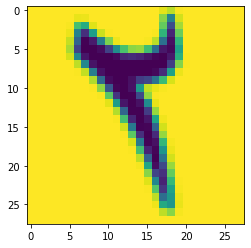

torch.Size([784])
<class 'torch.Tensor'>


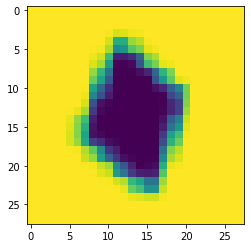

torch.Size([784])
<class 'torch.Tensor'>


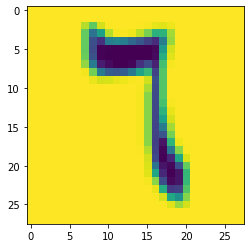

torch.Size([784])
<class 'torch.Tensor'>


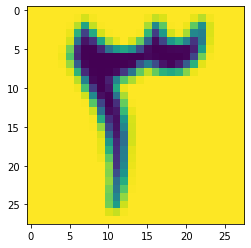

torch.Size([784])
<class 'torch.Tensor'>


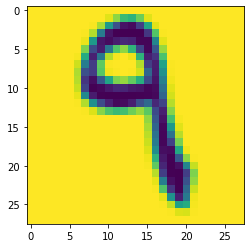

torch.Size([784])
<class 'torch.Tensor'>


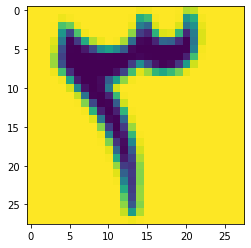

torch.Size([784])
<class 'torch.Tensor'>


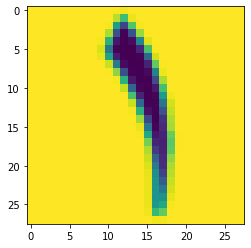

torch.Size([784])
<class 'torch.Tensor'>


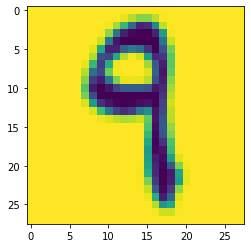

torch.Size([784])
<class 'torch.Tensor'>


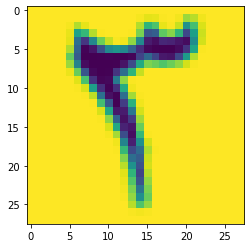

torch.Size([784])
<class 'torch.Tensor'>


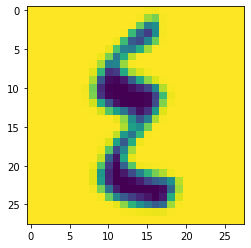

torch.Size([784])
<class 'torch.Tensor'>


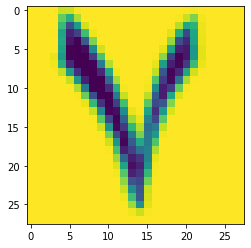

torch.Size([784])
<class 'torch.Tensor'>


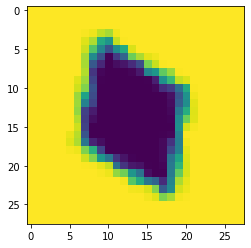

torch.Size([784])
<class 'torch.Tensor'>


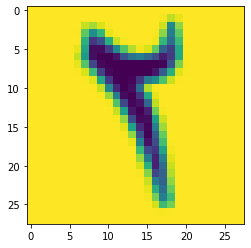

torch.Size([784])
<class 'torch.Tensor'>


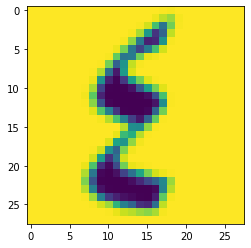

torch.Size([784])
<class 'torch.Tensor'>


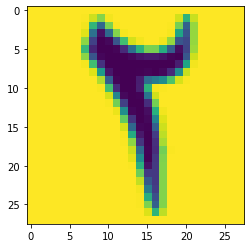

torch.Size([784])
<class 'torch.Tensor'>


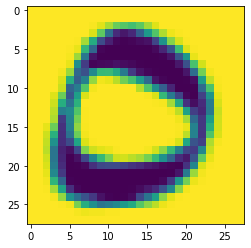

torch.Size([784])
<class 'torch.Tensor'>


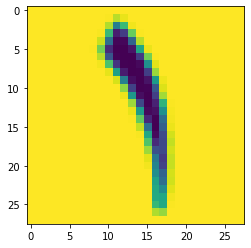

torch.Size([784])
<class 'torch.Tensor'>


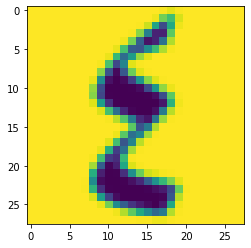

torch.Size([784])
<class 'torch.Tensor'>


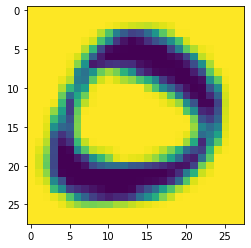

torch.Size([784])
<class 'torch.Tensor'>


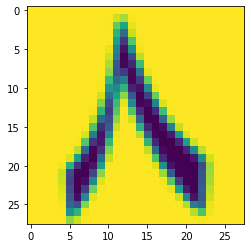

torch.Size([784])
<class 'torch.Tensor'>


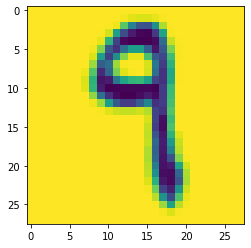

torch.Size([784])
<class 'torch.Tensor'>


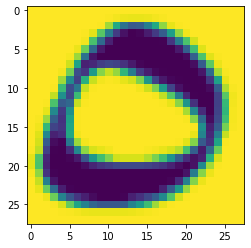

torch.Size([784])
<class 'torch.Tensor'>


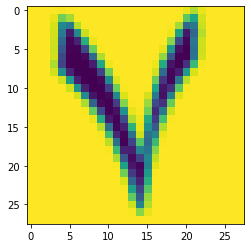

torch.Size([784])
<class 'torch.Tensor'>


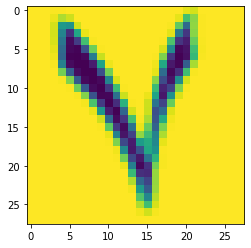

torch.Size([784])
<class 'torch.Tensor'>


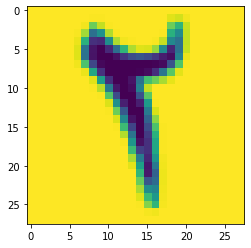

torch.Size([784])
<class 'torch.Tensor'>


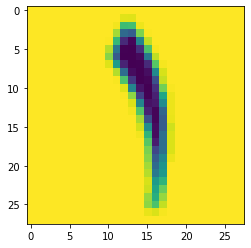

torch.Size([784])
<class 'torch.Tensor'>


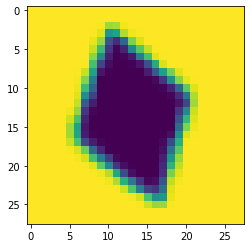

torch.Size([784])
<class 'torch.Tensor'>


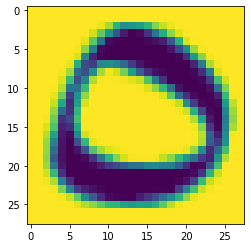

torch.Size([784])
<class 'torch.Tensor'>


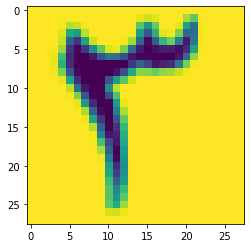

torch.Size([784])
<class 'torch.Tensor'>


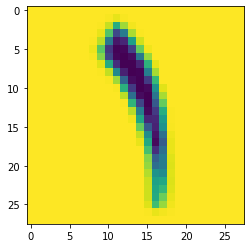

torch.Size([784])
<class 'torch.Tensor'>


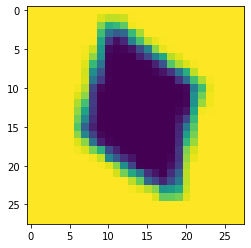

torch.Size([784])
<class 'torch.Tensor'>


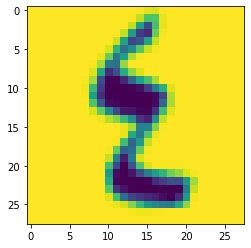

torch.Size([784])
<class 'torch.Tensor'>


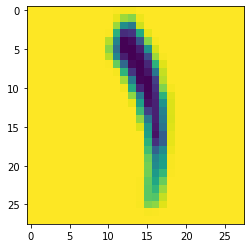

torch.Size([784])
<class 'torch.Tensor'>


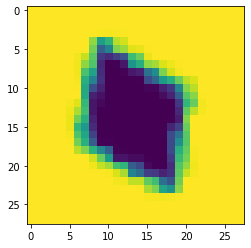

torch.Size([784])
<class 'torch.Tensor'>


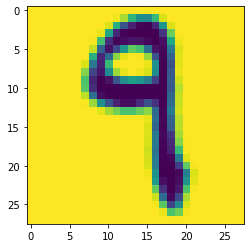

torch.Size([784])
<class 'torch.Tensor'>


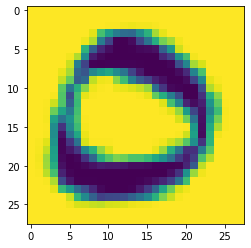

In [ ]:
def show_input(input_tensor, title=''):
    #image = input_tensor.permute(1, 2, 0).numpy()
    image = input_tensor.numpy()
    # image = std * image + mean
    plt.imshow(image.clip(0, 1))
    plt.title(title)
    plt.show()
    plt.pause(0.001)

X_batch, y_batch = next(iter(train_dataloader))

for x_item, y_item in zip(X_batch, y_batch):
    print(x_item.shape)
    print(type(x_item))
    #show_input(x_item, title=class_names[y_item])
    #plt.imshow(x_item[0, :, :])
    plt.imshow(x_item.reshape([28, 28]))
    plt.show()

In [ ]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [ ]:
#mnist_net_2 = torch.load(data_root+'mnist_net.pth')

In [ ]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10) 
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x
    
mnist_net_2 = MNISTNet(100)
# mnist_net_2 = torch.load(data_root+'mnist_net.pth')

In [ ]:
mnist_net_2.load_state_dict(torch.load(data_root+'mnist_net_2.pth'))
mnist_net_2.train()

MNISTNet(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (ac1): Sigmoid()
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)

In [ ]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net_2.parameters(), lr=1.0e-3)

In [ ]:
test_accuracy_history = []
test_loss_history = []

# X_test = X_test.to(device)
# y_test = y_test.to(device)

for epoch in range(30):
    #order = np.random.permutation(len(X_train))
    
    optimizer.zero_grad()

    X_batch, y_batch = next(iter(train_dataloader))
    X_test, y_test = next(iter(val_dataloader))
       
    preds = mnist_net_2.forward(X_batch) 
        
    loss_value = loss(preds, y_batch)
    loss_value.backward()
        
    optimizer.step()

    test_preds = mnist_net_2.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)
    print('accuracy =', accuracy.item(), ' loss =',loss_value.item())

accuracy = 1.0  loss = 0.2974628508090973
accuracy = 1.0  loss = 0.2982553243637085
accuracy = 1.0  loss = 0.2827413082122803
accuracy = 1.0  loss = 0.29171890020370483
accuracy = 1.0  loss = 0.25591322779655457
accuracy = 1.0  loss = 0.23901590704917908
accuracy = 1.0  loss = 0.25343695282936096
accuracy = 1.0  loss = 0.24716956913471222
accuracy = 1.0  loss = 0.24312691390514374
accuracy = 1.0  loss = 0.22979387640953064
accuracy = 1.0  loss = 0.24055425822734833
accuracy = 1.0  loss = 0.20516552031040192
accuracy = 1.0  loss = 0.20363439619541168
accuracy = 1.0  loss = 0.20981115102767944
accuracy = 1.0  loss = 0.19584304094314575
accuracy = 1.0  loss = 0.18380355834960938
accuracy = 1.0  loss = 0.18302595615386963
accuracy = 1.0  loss = 0.1811077892780304
accuracy = 1.0  loss = 0.16711066663265228
accuracy = 1.0  loss = 0.1586616486310959
accuracy = 1.0  loss = 0.16098818182945251
accuracy = 1.0  loss = 0.15497027337551117
accuracy = 1.0  loss = 0.15861673653125763
accuracy = 1.0  

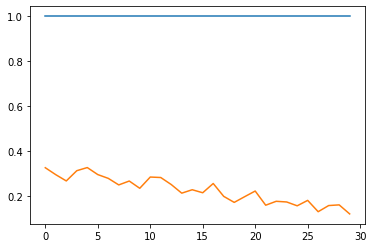

In [ ]:
plt.plot(test_accuracy_history)
plt.plot(test_loss_history);

In [ ]:
torch.save(mnist_net_2.state_dict(), data_root+'mnist_net_2.pth')

In [ ]:
model = torch.load(data_root+'mnist_net.pth')